In [502]:
words = open('names.txt', 'r').read().splitlines()
max(len(w) for w in words)

15

In [503]:
# Bigrams
b = {}
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1

In [504]:
import torch

In [514]:
N = torch.zeros((27, 27), dtype = torch.int32)

In [515]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i, in stoi.items()}

In [516]:
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1

In [517]:
import matplotlib.pyplot as plt
%matplotlib inline

(-0.5, 26.5, 26.5, -0.5)

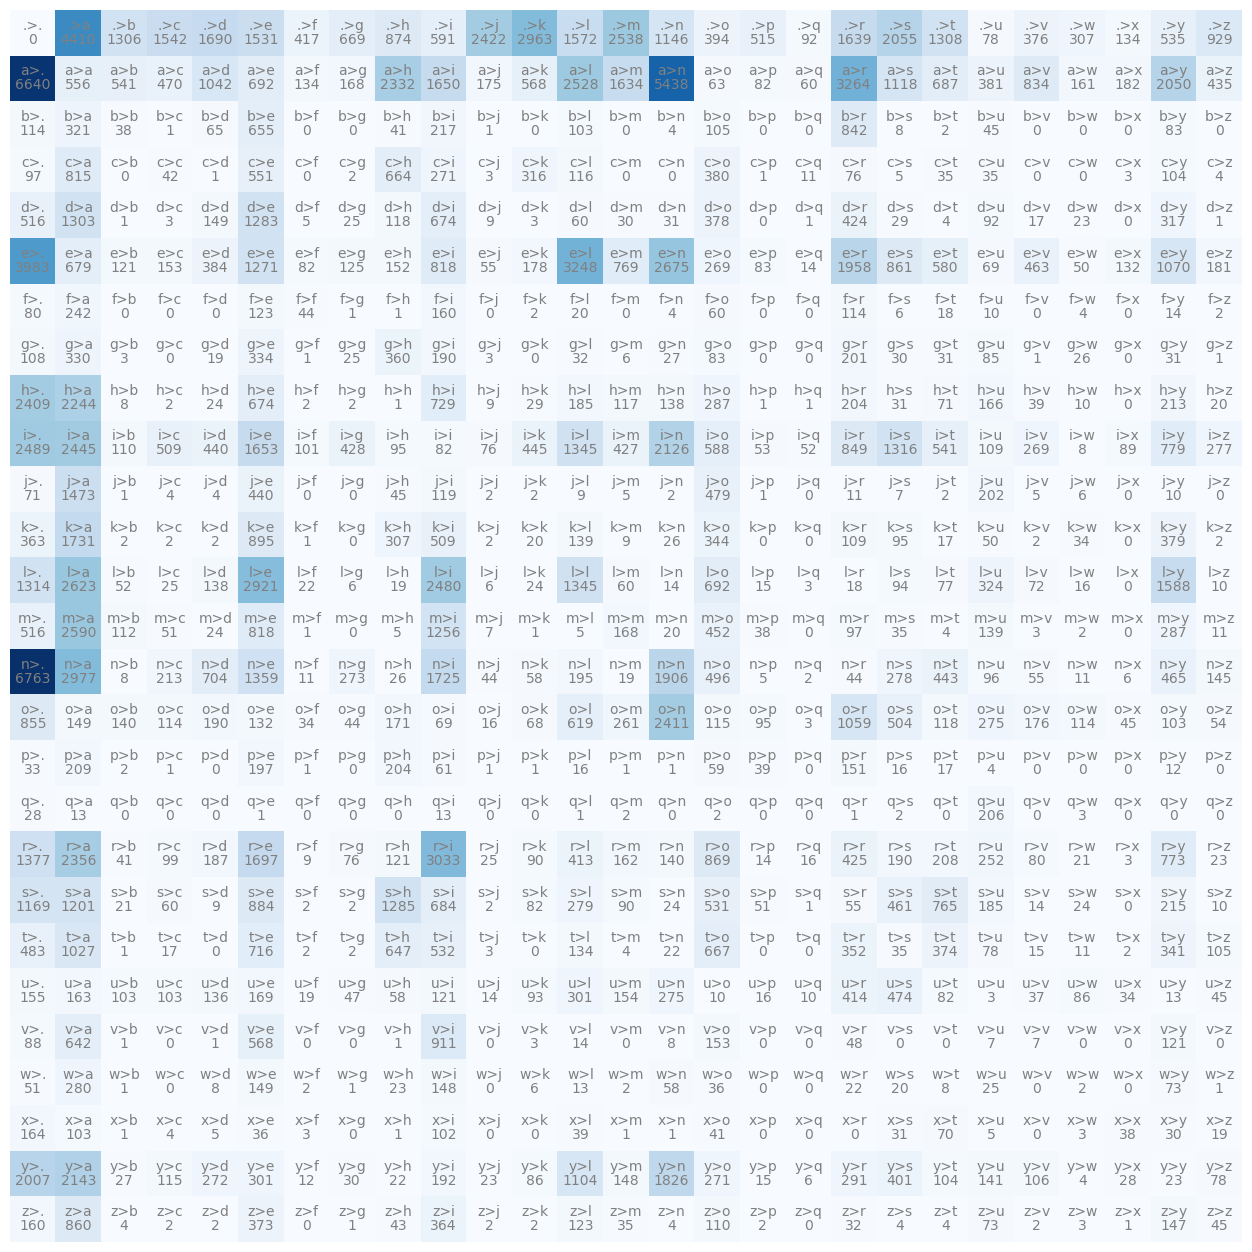

In [518]:
plt.figure(figsize=(16,16))
plt.imshow(N, cmap = 'Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + '>' + itos[j]
        plt.text(j, i, chstr, ha = "center", va = "bottom", color = "gray")
        plt.text(j, i, N[i, j].item(), ha = "center", va = "top", color = "gray")
plt.axis('off')

In [519]:
N[0]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [520]:
p = N[0].float()
p = p / p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [521]:
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()

In [524]:
P = (N+1).float()
P /= P.sum(1, keepdim=True)

In [526]:
g = torch.Generator().manual_seed(2147483647)
for i in range(10):
    ix = 0
    out = []
    while True:
        p = P[ix]
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))

cexze.
momasurailezitynn.
konimittain.
llayn.
ka.
da.
staiyaubrtthrigotai.
moliellavo.
ke.
teda.


In [527]:
log_likelihood = 0.0
n = 0
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
        
print(f'{log_likelihood:0.4f}')
nll = -log_likelihood
print(f'{nll=}')
print(f'{nll / n}')

-559951.5625
nll=tensor(559951.5625)
2.4543561935424805


In [501]:
# Trigram Version

In [529]:
# Create Trigram
b = []
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        b.append(ch1+ch2)

In [530]:
# Trigram version
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i, in stoi.items()}

bis = []
for ch1 in chars + ['.']:
    for ch2 in chars + ['.']:
        bis.append(ch1+ch2)
bis = sorted(bis)
btoi = {s:i for i,s in enumerate(bis)}
itob = {i:s for s,i, in btoi.items()}

In [531]:
N = torch.zeros((27*27, 27), dtype = torch.int32)

# Trigram version
for w in words:
    chs = ['.'] + list(w) + ['.']
    for trigram in zip(*[chs[i:] for i in range(3)]):
        ix1 = btoi[trigram[0]+trigram[1]]
        ix2 = stoi[trigram[2]]
        N[ix1, ix2] += 1

In [532]:
print(N[btoi['.e'], stoi['m']])
print(N[btoi['em'], stoi['m']])
print(N[btoi['mm'], stoi['a']])
print(N[btoi['ma'], stoi['.']])
print(N[btoi['.e'], stoi['.']])

tensor(288, dtype=torch.int32)
tensor(100, dtype=torch.int32)
tensor(72, dtype=torch.int32)
tensor(174, dtype=torch.int32)
tensor(0, dtype=torch.int32)


In [533]:
# Trigram Version

P = (N+1).float()
P /= P.sum(1, keepdim=True)

g = torch.Generator().manual_seed(2147483647)
for i in range(10):
    ix1 = 0
    ix2 = torch.multinomial(P[0], num_samples=1, generator=g, replacement=True).item()
    out = []
    out.append(itos[ix2])
    while True:
        p = P[btoi[itos[ix1]+itos[ix2]]]
        ix1, ix2 = ix2, torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix2])
        if ix2 == 0:
            break
    print(''.join(out))

ce.
za.
zogh.
uriana.
kaydnevonimittain.
luwak.
ka.
da.
samiyah.
javer.


In [534]:
# Trigram version
log_likelihood = 0.0
n = 0
for w in words:
    chs = ['.'] + list(w) + ['.']
    for trigram in zip(*[chs[i:] for i in range(3)]):
        ix1 = btoi[trigram[0]+trigram[1]]
        ix2 = stoi[trigram[2]]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
        
print(f'{log_likelihood:0.4f}')
nll = -log_likelihood
print(f'{nll=}')
print(f'{nll / n}')

-410414.9688
nll=tensor(410414.9688)
2.092747449874878


In [ ]:
# NN Approach

In [189]:
# create the training set of all the bigrams
xs, ys = [], []

for w in words[:1]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

tensor([ 5, 13, 13,  1,  0])

In [182]:
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes = 27).float()
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [179]:
W = torch.randn((27, 27))
logits = xenc @ W #log-counts
counts = logits.exp() # Equivalent to the N Matrix above
probs = counts / counts.sum(1, keepdims=True)
probs

tensor([[0.0277, 0.0146, 0.0155, 0.0945, 0.0039, 0.0190, 0.0425, 0.0061, 0.0012,
         0.0169, 0.0023, 0.2680, 0.0277, 0.0180, 0.0249, 0.0639, 0.0251, 0.0059,
         0.0106, 0.0166, 0.0113, 0.0588, 0.0145, 0.0254, 0.0379, 0.1302, 0.0171],
        [0.0078, 0.0477, 0.1674, 0.0496, 0.0182, 0.0210, 0.0128, 0.0171, 0.0166,
         0.0279, 0.0334, 0.0284, 0.0488, 0.0264, 0.0032, 0.0021, 0.0120, 0.0073,
         0.0127, 0.1521, 0.0125, 0.0283, 0.0764, 0.0053, 0.0554, 0.1078, 0.0018],
        [0.0055, 0.0345, 0.0340, 0.0142, 0.0048, 0.0139, 0.0515, 0.0343, 0.0110,
         0.0418, 0.1131, 0.2226, 0.0120, 0.0219, 0.0182, 0.0039, 0.0092, 0.0100,
         0.0477, 0.0064, 0.0134, 0.1295, 0.0588, 0.0082, 0.0047, 0.0354, 0.0394],
        [0.0055, 0.0345, 0.0340, 0.0142, 0.0048, 0.0139, 0.0515, 0.0343, 0.0110,
         0.0418, 0.1131, 0.2226, 0.0120, 0.0219, 0.0182, 0.0039, 0.0092, 0.0100,
         0.0477, 0.0064, 0.0134, 0.1295, 0.0588, 0.0082, 0.0047, 0.0354, 0.0394],
        [0.0312, 0.1108,

In [183]:
# Summary

In [292]:
# Example from video
nlls = torch.zeros(5)
for i in range(5):
    #i-th bigram
    x = xs[i].item()
    y = ys[i].item()
    print('-------')
    print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x},{y})')
    print('input to the neural net:', x)
    print('output probabilities from the neural net:', probs[i])
    print('label (actual next next character):', y)
    p = probs[i, y]
    print('probability assigned by the net to the correct character:', p.item())
    logp = torch.log(p)
    print('log likelihood', logp.item())
    nll = -logp
    print('negative log likelihood:', nll.item())
    nlls[i] = nll

print('---------')
print('average negative log likelihood (loss) = ', nlls.mean().item())

-------
bigram example 1: .e (indexes 0,5)
input to the neural net: 0
output probabilities from the neural net: tensor([4.1492e-05, 1.3767e-01, 4.0769e-02, 4.8136e-02, 5.2756e-02, 4.7793e-02,
        1.3016e-02, 2.0883e-02, 2.7283e-02, 1.8448e-02, 7.5608e-02, 9.2497e-02,
        4.9073e-02, 7.9229e-02, 3.5774e-02, 1.2298e-02, 1.6076e-02, 2.8704e-03,
        5.1164e-02, 6.4151e-02, 4.0831e-02, 2.4334e-03, 1.1736e-02, 9.5823e-03,
        4.1816e-03, 1.6700e-02, 2.9000e-02], grad_fn=<SelectBackward0>)
label (actual next next character): 5
probability assigned by the net to the correct character: 0.047792818397283554
log likelihood -3.040879964828491
negative log likelihood: 3.040879964828491
-------
bigram example 2: em (indexes 5,13)
input to the neural net: 5
output probabilities from the neural net: tensor([0.1950, 0.0332, 0.0059, 0.0075, 0.0188, 0.0622, 0.0040, 0.0061, 0.0074,
        0.0401, 0.0027, 0.0087, 0.1590, 0.0377, 0.1310, 0.0132, 0.0041, 0.0007,
        0.0959, 0.0422, 0.028

In [294]:
xs, ys = [], []
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()

# randomly initialize 27 neurons' weights. Each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

In [305]:
# gradient descent
for k in range(100):
    # forward pass
    xenc = F.one_hot(xs, num_classes = 27).float()
    logits = xenc @ W #predict log-counts
    counts = logits.exp() #counts, equivalent to N
    probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
    # The last two lines are together called a softmax
    loss = -probs[torch.arange(num), ys].log().mean() + 0.01*((W**2).mean())

    # backward pass
    W.grad = None # zero out the gradient
    loss.backward()
    
    # update
    W.data += -50 * W.grad

In [306]:
print(loss)

tensor(2.4862, grad_fn=<AddBackward0>)


In [327]:
# Sampling from NN
g = torch.Generator().manual_seed(2147483647)
for i in range(10):
    ix = 0
    out = []
    while True:
        #p = P[ix]
        xenc = F.one_hot(torch.tensor([ix]), num_classes = 27).float()
        logits = xenc @ W
        counts = logits.exp()
        p = counts / counts.sum(1, keepdims=True)
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))

cexze.
momasurailezityha.
konimittain.
llayn.
ka.
da.
staiyaubrtthrigotai.
moliellavo.
ke.
teda.


In [ ]:
# Trigram NN Approach

In [565]:
# Trigram version

xs, ys = [], []

for w in words:
    chs = ['.'] + list(w) + ['.']
    for trigram in zip(*[chs[i:] for i in range(3)]):
        ix1 = btoi[trigram[0]+trigram[1]]
        ix2 = stoi[trigram[2]]
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()

# randomly initialize 729 neurons' weights. Each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((729, 27), generator=g, requires_grad=True)

In [566]:
# gradient descent
for k in range(10000):
    # forward pass
    xenc = F.one_hot(xs, num_classes = 729).float()
    logits = xenc @ W #predict log-counts
    counts = logits.exp() #counts, equivalent to N
    probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
    # The last two lines are together called a softmax
    loss = -probs[torch.arange(num), ys].log().mean() + 0.01*((W**2).mean())

    # backward pass
    W.grad = None # zero out the gradient
    loss.backward()
    
    # update
    W.data += -100 * W.grad

In [567]:
print(loss)

tensor(2.0889, grad_fn=<AddBackward0>)


In [568]:
# Sampling from NN
g = torch.Generator().manual_seed(2147483647)
for i in range(10):
    ix1 = 0
    xenc = F.one_hot(torch.tensor([ix1]), num_classes = 729).float()
    logits = xenc @ W
    counts = logits.exp()
    p = counts / counts.sum(1, keepdims=True)
    ix2 = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out = []
    out.append(itos[ix2])
    while True:
        xenc = F.one_hot(torch.tensor([btoi[itos[ix1]+itos[ix2]]]), num_classes = 729).float()
        logits = xenc @ W
        counts = logits.exp()
        p = counts / counts.sum(1, keepdims=True)
        ix1, ix2 = ix2, torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix2])
        if ix2 == 0:
            break
    print(''.join(out))

texza.
zora.
uriana.
kaydnevonimittain.
luwak.
ka.
da.
romiyah.
javer.
gotai.
